# Задача 1.6

Используя датасет https://www.kaggle.com/datasets/andrewmvd/data-engineer-jobs:

* Построить график компаний с самым большим кол-вом вакансий
* Построить график самых популярный названий в вакансиях
* Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму
* Построить график популярности по колонке Type of ownership, относительно численности вакансий
* Построить график популярности по секторам работы
* Построить график используя сектора работы и средний уровень зарплат в них
* Построить гистограмму распределения рейтинга компаний
* Построить график средних зарплат по популярным компаниям
* Построить описаний вакансий облако тегов, исследовать самые популярные слова

В графиках использовать основные цвета сайта hh.ru

## Импортируем библиотеки

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import seaborn as sns
import warnings

from matplotlib.pyplot import figure
from wordcloud import WordCloud

%matplotlib inline
warnings.filterwarnings("ignore")

## Загружаем датасет

In [13]:
df = pd.read_csv('DataEngineer.csv')
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


## Проанализируем и обработаем датасет

In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [16]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          2528 non-null   object 
 1   salary_estimate    2528 non-null   object 
 2   job_description    2528 non-null   object 
 3   rating             2528 non-null   float64
 4   company_name       2528 non-null   object 
 5   location           2528 non-null   object 
 6   headquarters       2528 non-null   object 
 7   size               2528 non-null   object 
 8   founded            2528 non-null   int64  
 9   type_of_ownership  2528 non-null   object 
 10  industry           2528 non-null   object 
 11  sector             2528 non-null   object 
 12  revenue            2528 non-null   object 
 13  competitors        2528 non-null   object 
 14  easy_apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


In [18]:
df.duplicated().sum()

12

In [19]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          2516 non-null   object 
 1   salary_estimate    2516 non-null   object 
 2   job_description    2516 non-null   object 
 3   rating             2516 non-null   float64
 4   company_name       2516 non-null   object 
 5   location           2516 non-null   object 
 6   headquarters       2516 non-null   object 
 7   size               2516 non-null   object 
 8   founded            2516 non-null   int64  
 9   type_of_ownership  2516 non-null   object 
 10  industry           2516 non-null   object 
 11  sector             2516 non-null   object 
 12  revenue            2516 non-null   object 
 13  competitors        2516 non-null   object 
 14  easy_apply         2516 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 295.0+ KB


## Приступим к реализации

### Определим основные цвета HH
В графиках использовать основные цвета сайта hh.ru

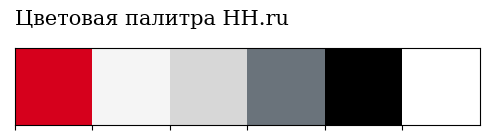

In [98]:
sns.palplot(['#d6001c', '#f5f5f5', '#d7d7d7', '#6a737b', '#000000', '#ffffff']) #['#303233', '#d6001c', '#1785e5','#ffffff']
color_map = ['#d6001c', '#f5f5f5', '#d7d7d7', '#6a737b', '#000000', '#ffffff'] #['#f5f5f1' for _ in range(10)]

plt.title("Цветовая палитра HH.ru",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

### Построить график компаний с самым большим кол-вом вакансий

In [21]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


In [50]:
company_most_vacancy = df['company_name'].value_counts()[:10]
company_most_vacancy.head()

Amazon\n3.9             28
Apple\n4.1              18
Lockheed Martin\n3.8    18
IntraEdge\n3.8          16
Humana\n3.6             16
Name: company_name, dtype: int64

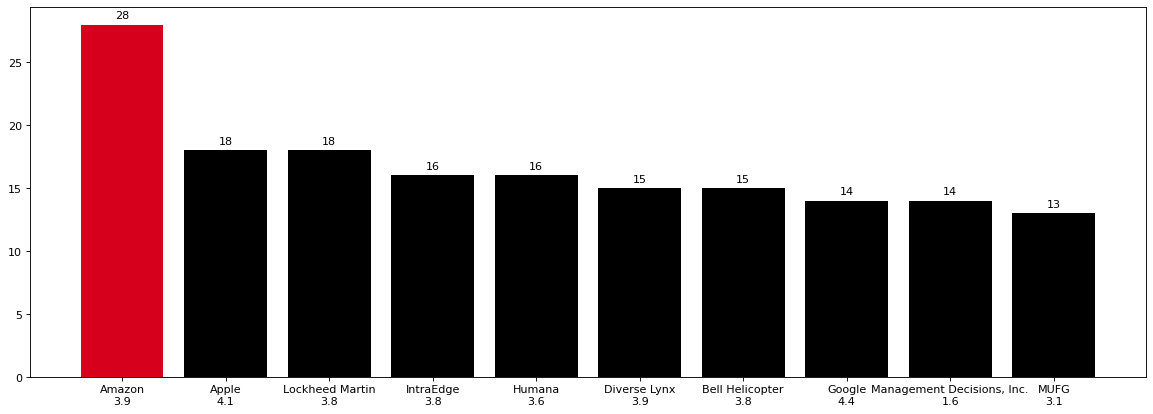

In [135]:
figure(figsize=(18, 6), dpi=80)

colors_here = [color_map[4] for _ in range(10)]
colors_here[0] = color_map[0]

plt.bar(company_most_vacancy.index, company_most_vacancy.values, color = colors_here)
for i in range(len(company_most_vacancy.index)):
    plt.text(i, company_most_vacancy.values[i]+.5, company_most_vacancy.values[i], ha = 'center')

### Построить график самых популярный названий в вакансиях

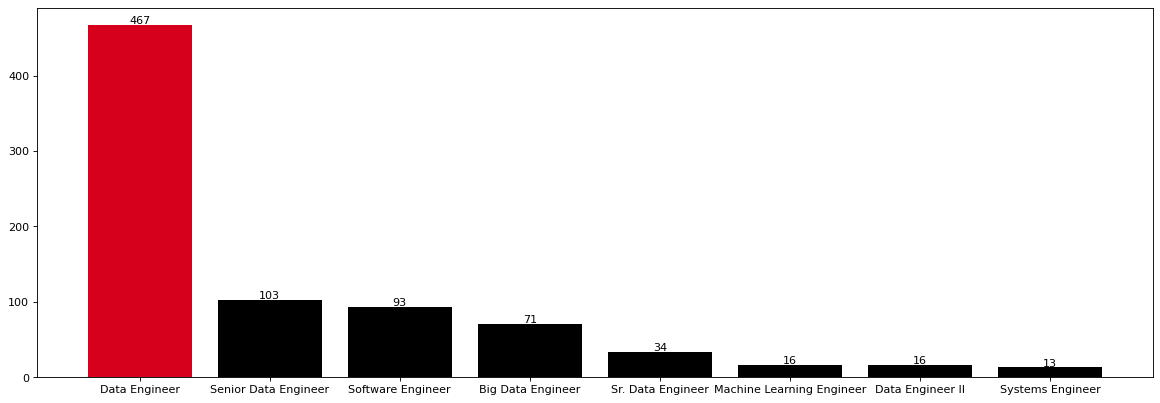

In [139]:
most_name_vacancy = df['job_title'].value_counts()[:8]
figure(figsize=(18, 6), dpi=80)

colors_here = [color_map[4] for _ in range(8)]
colors_here[0] = color_map[0]

plt.bar(most_name_vacancy.index, most_name_vacancy.values, color = colors_here)
for i in range(len(most_name_vacancy.index)):
    plt.text(i, most_name_vacancy.values[i]+1.5, most_name_vacancy.values[i], ha = 'center')

### Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [69]:
most_popular_location = df['location'].value_counts()[:10]
most_popular_location.head()

Houston, TX        199
Austin, TX         198
San Diego, CA      195
Chicago, IL        192
San Antonio, TX    189
Name: location, dtype: int64

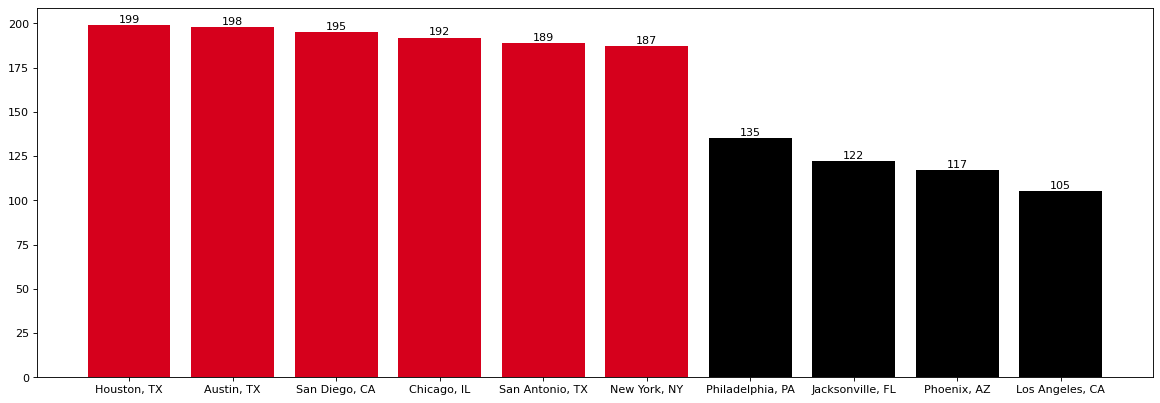

In [144]:
figure(figsize=(18, 6), dpi=80)

colors_here = [color_map[4] for _ in range(10)]
colors_here[0] = colors_here[1] =colors_here[2] = colors_here[3] =colors_here[4] =colors_here[5] =color_map[0]

plt.bar(most_popular_location.index, most_popular_location.values, color = colors_here)
for i in range(len(most_popular_location.index)):
    plt.text(i, most_popular_location.values[i]+1.5, most_popular_location.values[i], ha = 'center')

([<matplotlib.patches.Wedge at 0x23705f30490>,
 [Text(1.0209433089254047, 0.4094810862060001, 'Houston, TX'),
  Text(0.4569565270769591, 1.0005951890558762, 'Austin, TX'),
  Text(-0.3511283114009475, 1.0424533125913695, 'San Diego, CA'),
  Text(-0.9631643384877602, 0.5313327178571214, 'Chicago, IL'),
  Text(-1.0719833503338738, -0.24668136655808373, 'San Antonio, TX'),
  Text(-0.642634258834801, -0.8927604434403701, 'New York, NY'),
  Text(-0.007379575207606538, -1.0999752460259073, 'Philadelphia, PA'),
  Text(0.5137069112131948, -0.9726793970120879, 'Jacksonville, FL'),
  Text(0.8909090490104813, -0.6451984705431656, 'Phoenix, AZ'),
  Text(1.0777967242124182, -0.21989593283410405, 'Los Angeles, CA')])

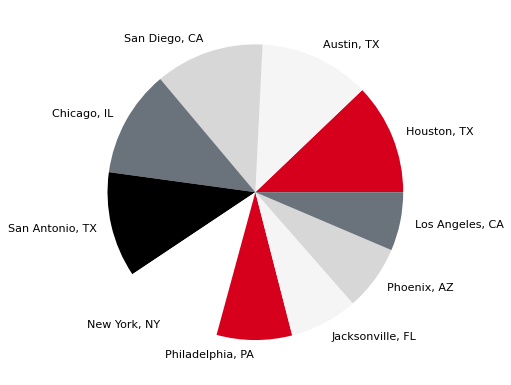

In [148]:
figure(figsize=(18, 6), dpi=80)
plt.pie(most_popular_location, labels=most_popular_location.index, colors=color_map)

### Построить график популярности по колонке Type of ownership, относительно численности вакансий

In [271]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,salary
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,115000
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,115000
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,115000
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,115000
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,115000


In [276]:
count_vacancy_own = df["type_of_ownership"].value_counts()
count_vacancy_own = count_vacancy_own[:7]

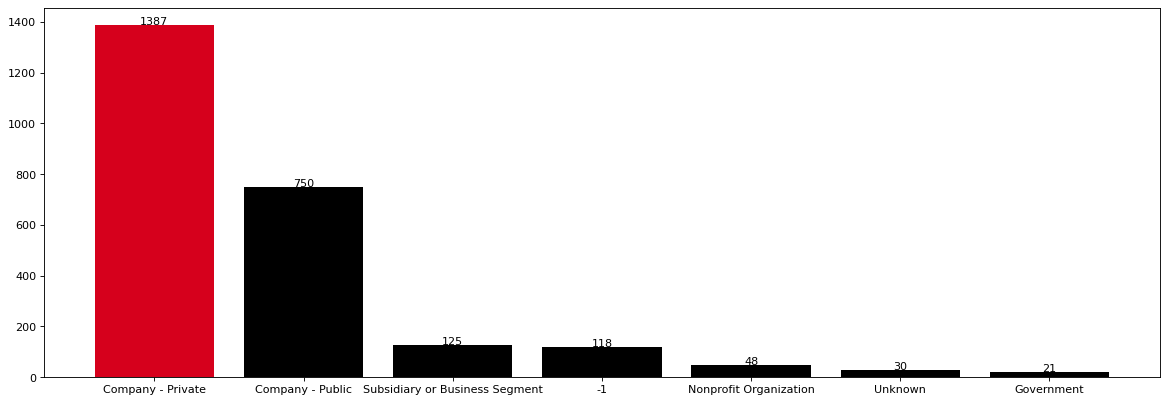

In [277]:
figure(figsize=(18, 6), dpi=80)

colors_here = [color_map[4] for _ in range(7)]
colors_here[0] = color_map[0]

plt.bar(count_vacancy_own.index, count_vacancy_own.values, color = colors_here)
for i in range(len(count_vacancy_own.index)):
    plt.text(i, count_vacancy_own.values[i]+1.5, count_vacancy_own.values[i], ha = 'center')

### Построить график популярности по секторам работы

In [149]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


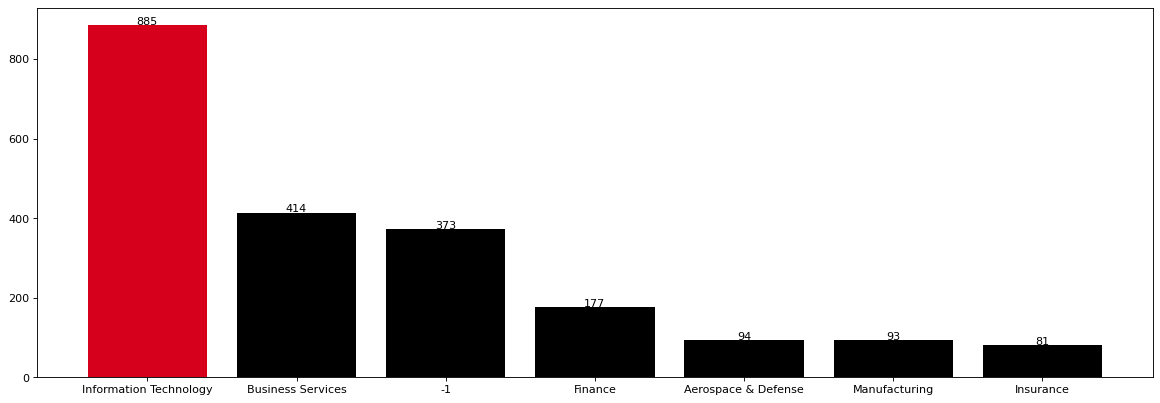

In [151]:
most_popular_sector = df['sector'].value_counts()[:7]
figure(figsize=(18, 6), dpi=80)

colors_here = [color_map[4] for _ in range(7)]
colors_here[0] = color_map[0]

plt.bar(most_popular_sector.index, most_popular_sector.values, color = colors_here)
for i in range(len(most_popular_sector.index)):
    plt.text(i, most_popular_sector.values[i]+1.5, most_popular_sector.values[i], ha = 'center')

### Построить график используя сектора работы и средний уровень зарплат в них

In [159]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


In [160]:
df['salary_estimate'].unique()

array(['$80K-$150K (Glassdoor est.)', '$73K-$94K (Glassdoor est.)',
       '$85K-$154K (Glassdoor est.)', '$84K-$113K (Glassdoor est.)',
       '$57K-$75K (Glassdoor est.)', '$105K-$121K (Glassdoor est.)',
       '$92K-$117K (Glassdoor est.)', '$88K-$136K (Glassdoor est.)',
       '$95K-$167K (Glassdoor est.)', '$79K-$146K (Glassdoor est.)',
       '$93K-$106K (Glassdoor est.)', '$115K-$201K (Glassdoor est.)',
       '$94K-$164K (Glassdoor est.)', '$49K-$98K (Glassdoor est.)',
       '$56K-$108K (Glassdoor est.)', '$85K-$158K (Glassdoor est.)',
       '$133K-$210K (Glassdoor est.)', '$95K-$99K (Glassdoor est.)',
       '$67K-$72K (Glassdoor est.)', '$53K-$100K (Glassdoor est.)',
       '$81K-$100K (Glassdoor est.)', '$94K-$107K (Glassdoor est.)',
       '$43K-$84K (Glassdoor est.)', '$62K-$92K (Glassdoor est.)',
       '$55K-$106K (Glassdoor est.)', '$69K-$103K (Glassdoor est.)',
       '$54K-$113K (Glassdoor est.)', '$74K-$123K (Glassdoor est.)',
       '$69K-$122K (Glassdoor est.)', 

In [168]:
salary_list = []
for i in df['salary_estimate']:
    sal_from, sal_to, _ = i.lower().split('k')
    sal_from = int(sal_from.lstrip('$'))
    sal_to = int(sal_to.lstrip('-$'))
    salary_list.append((sal_to+sal_from)//2*1000)
df['salary'] = salary_list
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,salary
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,115000
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,115000
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,115000
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,115000
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,115000


In [189]:
mean_salary_sector = df.groupby("sector").agg({'salary':["mean"]}).sort_values(('salary', 'mean'), ascending=False)
mean_salary_sector

,salary
,mean
sector,
Biotech & Pharmaceuticals,112000.000000
Media,110826.923077
Health Care,106260.000000
Accounting & Legal,105925.925926
Non-Profit,105500.000000
Information Technology,104574.011299
Manufacturing,103365.591398
Education,102037.037037


In [190]:
x1 = list(mean_salary_sector.index)
x1

['Biotech & Pharmaceuticals',
 'Media',
 'Health Care',
 'Accounting & Legal',
 'Non-Profit',
 'Information Technology',
 'Manufacturing',
 'Education',
 'Transportation & Logistics',
 'Restaurants, Bars & Food Services',
 'Arts, Entertainment & Recreation',
 'Telecommunications',
 '-1',
 'Consumer Services',
 'Finance',
 'Business Services',
 'Retail',
 'Insurance',
 'Oil, Gas, Energy & Utilities',
 'Aerospace & Defense',
 'Travel & Tourism',
 'Real Estate',
 'Construction, Repair & Maintenance',
 'Government',
 'Agriculture & Forestry']

In [191]:
y1 = [int(y) for y in mean_salary_sector.values]
y1

[112000,
 110826,
 106260,
 105925,
 105500,
 104574,
 103365,
 102037,
 100541,
 100142,
 99400,
 99343,
 99327,
 99000,
 97514,
 97091,
 96416,
 94333,
 93027,
 90627,
 90000,
 85500,
 85428,
 82625,
 66000]

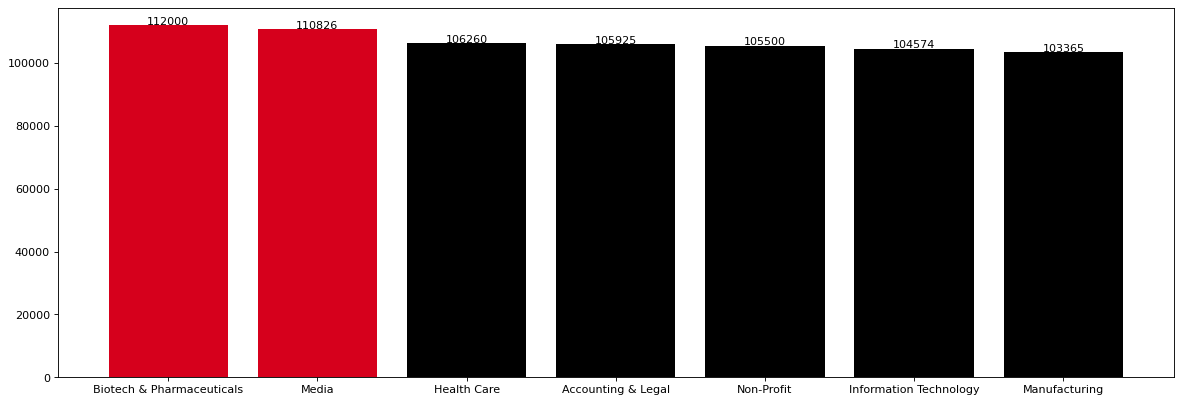

In [197]:
x1 = x1[:7]
y1 = y1[:7]
figure(figsize=(18, 6), dpi=80)

colors_here = [color_map[4] for _ in range(7)]
colors_here[0] = colors_here[1] = color_map[0]

plt.bar(x1, y1, color = colors_here)

for i in range(len(x1)):
    plt.text(i, y1[i]+250, y1[i], ha = 'center')

### Построить гистограмму распределения рейтинга компаний

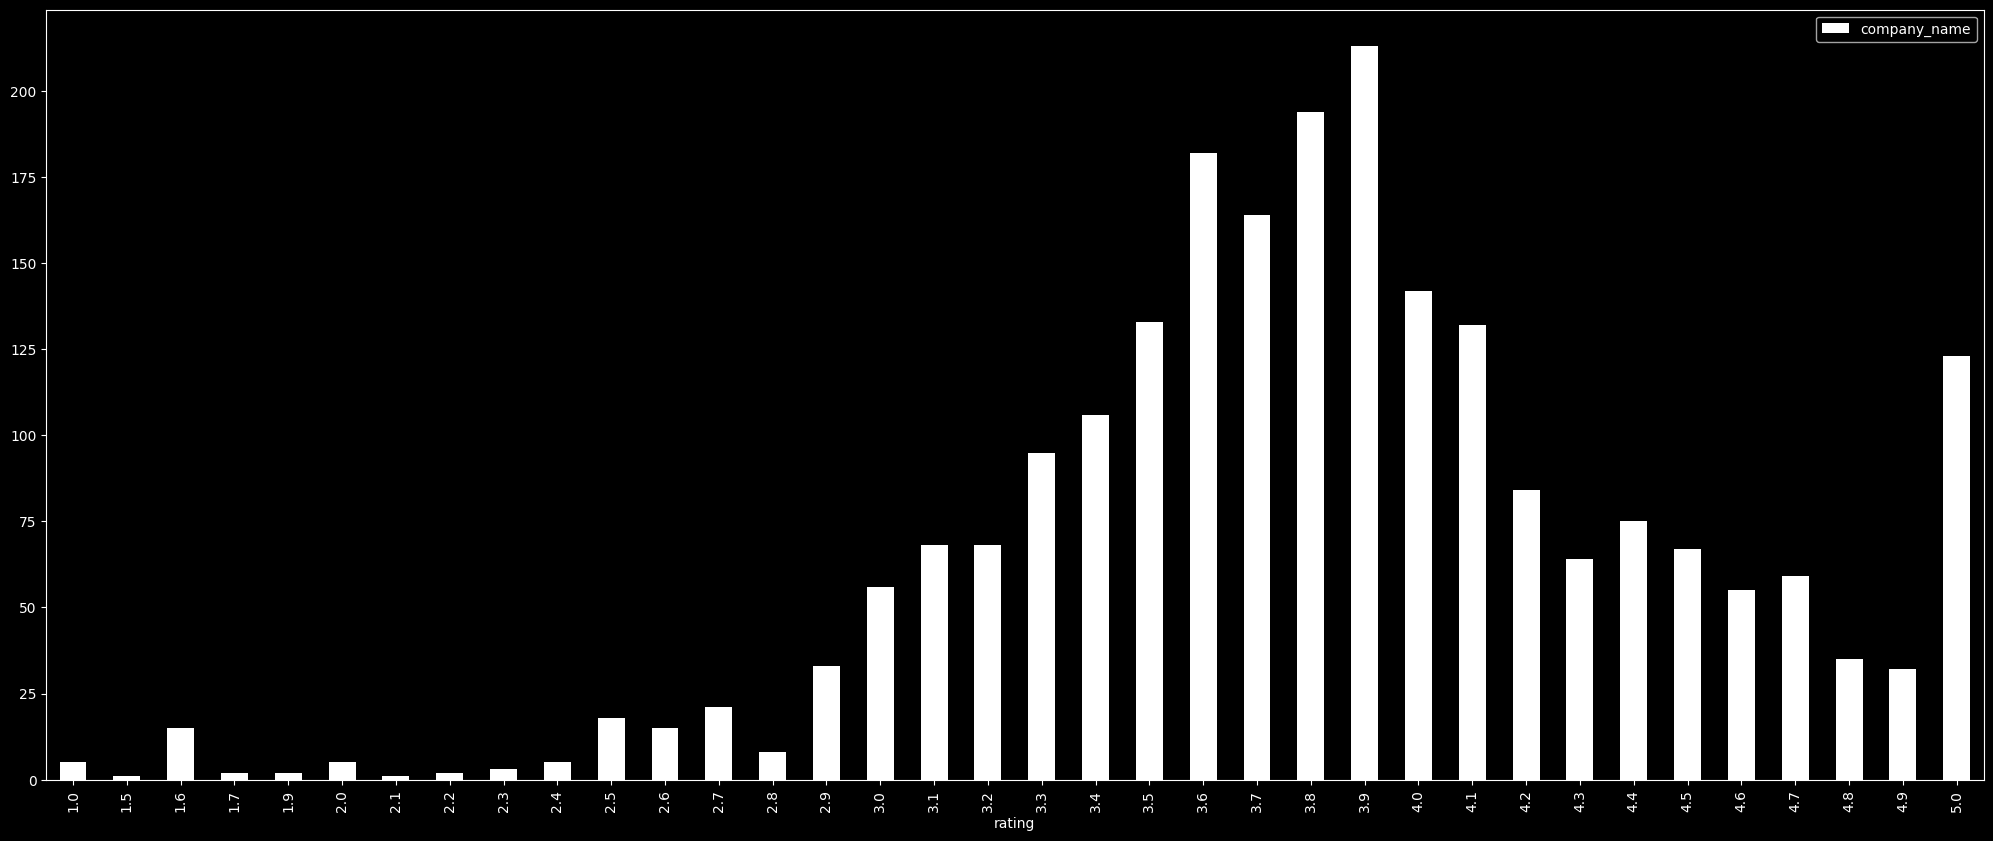

In [158]:
rating_groupby = df.groupby('rating').agg({'company_name':'count'})
rating_groupby.head()
with plt.style.context('dark_background'):
    rating_groupby.loc[1:].plot(y = 'company_name', kind= 'bar', figsize = (25,10), color = 'w')

### Построить график средних зарплат по популярным компаниям

In [198]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,salary
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,115000
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,115000
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,115000
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,115000
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,115000


In [222]:
mean_salary_company = df[df.rating == 5].groupby(["company_name", 'rating']).agg({'salary':["mean"]}).sort_values(('salary', 'mean'), ascending=False)
# mean_salary_company = mean_salary_company[mean_salary_company.rating == 5]
    #.sort_values('rating', ascending=False)
mean_salary_company

,,salary
,,mean
company_name,rating,
SVK Technology Solutions Inc\n5.0,5.0,204000.0
Myticas Consulting\n5.0,5.0,171000.0
Epirus\n5.0,5.0,158000.0
Indrasol\n5.0,5.0,153000.0
PriceSenz\n5.0,5.0,152000.0
...,...,...
Editech Staffing\n5.0,5.0,56000.0
ARC Group\n5.0,5.0,49000.0


In [261]:
xmax = mean_salary_company.values.tolist()[:10]

In [259]:
y2 = [i[0] for i in mean_salary_company.index]
y2 = y2[:10]
y2

['SVK Technology Solutions Inc\n5.0',
 'Myticas Consulting\n5.0',
 'Epirus\n5.0',
 'Indrasol\n5.0',
 'PriceSenz\n5.0',
 'Mount Indie\n5.0',
 'MediKeeper\n5.0',
 'Clumio\n5.0',
 'Rekruiters LLC.\n5.0',
 'Relativity Space\n5.0']

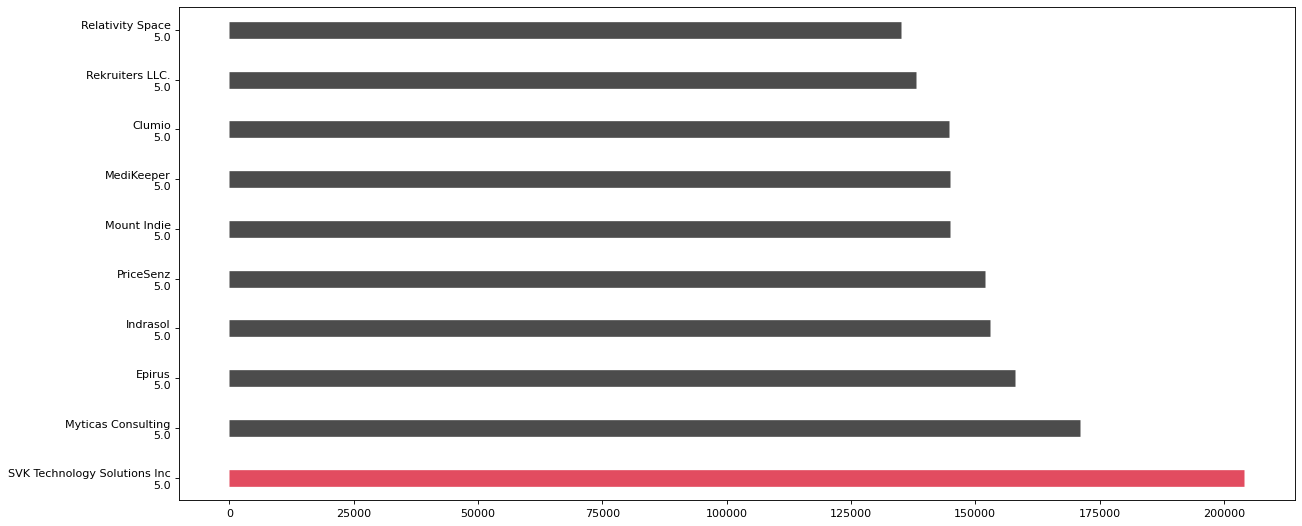

In [270]:
figure(figsize=(18, 8), dpi=80)

colors_here = [color_map[4] for _ in range(10)]
colors_here[0] = color_map[0]

plt.hlines(y = y2, xmin= 0, xmax=xmax, color = colors_here, alpha=0.7, linewidth=15)

### Построить описаний вакансий облако тегов, исследовать самые популярные слова

In [81]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


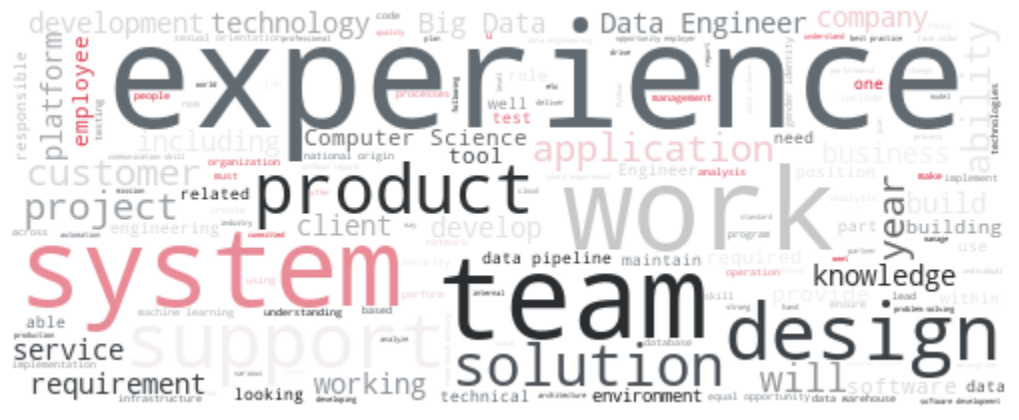

In [96]:

# Custom colour map based on Netflix palette
cmap = clrs.LinearSegmentedColormap.from_list("", ['#d6001c', '#f5f5f5', '#d7d7d7', '#6a737b', '#000000', '#ffffff'])

text = str(list(df['job_description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '').replace('\\n', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()